$\require{mhchem}$
# Lake example

Drainage from a nearby lignite mine feeds into Lake 1. The effluent stream is high in sulfate, above drinking water standards (250 mg/L). The inflow concentration into Lake 1 is 1000 mg/L. The discharge, Q, is 500 m3/day

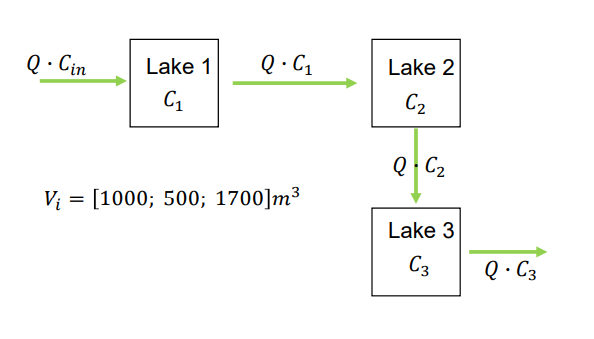

### Mass balance for each of the lakes. Assuming initial concentrations are 0.

***Rate equations for the system***

$\frac{dC_1}{dt} = (\frac{1}{V_1})*\left[C_{in}Q-C_1Q\right]$

$\frac{dC_2}{dt} = (\frac{1}{V_2})*\left[C_{1}Q-C_2Q\right]$

$\frac{dC_3}{dt} = (\frac{1}{V_3})*\left[C_{2}Q-C_3Q\right]$

#### righting ode equation for the system:

In [2]:
def dcdt(t,y,V,C_in,Q):
    '''
    decribe the system of ode describing the sulphate concentration in each lake
    '''
    r = np.zeros(y.shape)
    r[0] = (1/V[0])*Q*(C_in-y[0])
    r[1] = (1/V[1])*Q*(y[0]-y[1])
    r[2] = (1/V[2])*Q*(y[1]-y[2])
    return r
    

#### Parameters

In [3]:
import numpy as np

In [4]:
y0 = np.zeros(3) #nitial concentrations
V = np.array([1000,500,1700]) #m3
C_in = 1000 #mg/L
Q = 500 #m3/day


In [5]:
time_intervals = np.arange(0,31,0.25)

#### Compute the residence time for each lake

In [6]:
T_residence = V/Q

#### Result in days

In [7]:
T_residence

array([2. , 1. , 3.4])

#### Solving the system of equation

In [8]:
import scipy

In [9]:
results = scipy.integrate.odeint(dcdt,y0,t = time_intervals,args = (V,C_in,Q), tfirst = True)

In [10]:
results.shape

(124, 3)

#### Plotting the results

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'time [days]')

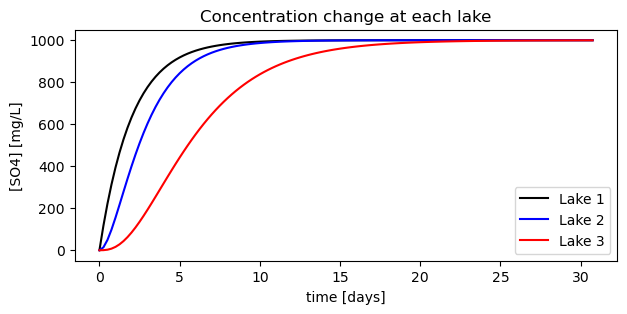

In [12]:
fig, ax = plt.subplots(figsize = (7,3), sharex = True)
ax.plot(time_intervals,results[:,0],'-k', label = 'Lake 1')
ax.plot(time_intervals,results[:,1],'-b', label = 'Lake 2')
ax.plot(time_intervals,results[:,2],'-r', label = 'Lake 3')
ax.legend()
ax.set_title('Concentration change at each lake')
ax.set_ylabel('[SO4] [mg/L]')
ax.set_xlabel('time [days]')

#### Analytical function

$c(t) = \frac{a}{b} - \left(\frac{a}{b}-c_0 \right)exp(-bt)$  

$ a =  C_{in}*Q/V_1$  
$ b =  Q/V_1$

In [13]:
a = C_in*Q/V[0]
b = Q/V[0]

In [14]:
c_anal = a/b-(a/b)*np.exp(-b*time_intervals)

Text(0.5, 0, 'time [days]')

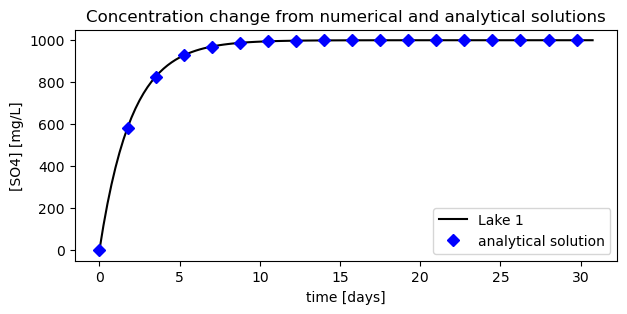

In [15]:
fig, ax = plt.subplots(figsize = (7,3), sharex = True)
ax.plot(time_intervals,results[:,0],'-k', label = 'Lake 1')
ax.plot(time_intervals[::7],c_anal[::7],'Db', label = 'analytical solution')
ax.legend()
ax.set_title('Concentration change from numerical and analytical solutions')
ax.set_ylabel('[SO4] [mg/L]')
ax.set_xlabel('time [days]')

## Practical 2

Drainage from a nearby lignite mine feeds into Lake 1. The effluent stream has elevated concentrations of a hydrocarbon, 90 mg/L, above recommended drinking water standards. In addition, the effluent is turbid, with 50 mg/L of suspended lignite-sediments. The hydrocarbon can be biodegraded and undergoes first-order decay in the water column of each lake. Different first-order reaction rates have been determined for each lake.

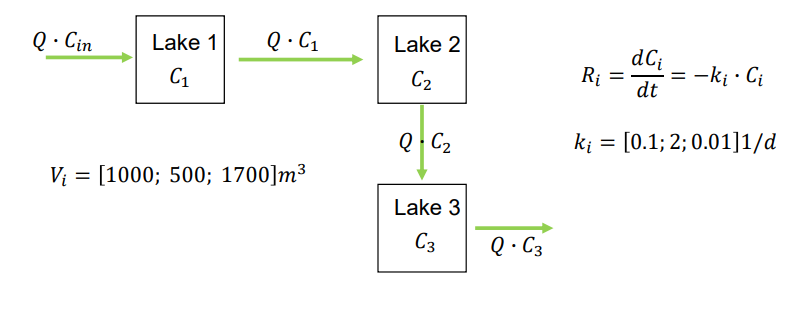

### Part 1: Spin-up to steady state

a. Compute residence time for each lake

$ \tau = 1/b, b = (1/V_i)*Q - k_i $

In [16]:
k = np.array([0.1,2,0.01]) #d^-1

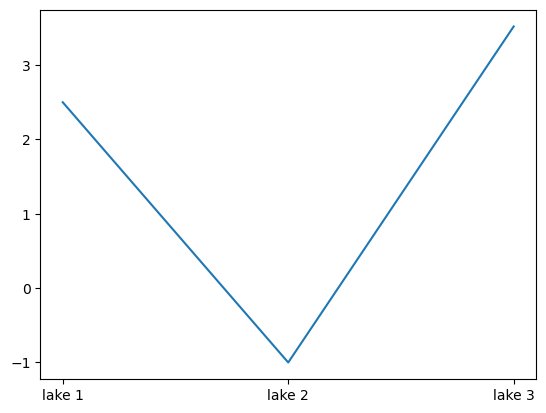

In [17]:
T_residence = 1/((1/V)*Q-k)
fig = plt.figure()
plt.plot(['lake 1','lake 2','lake 3'],T_residence)

We have a negative residence time for lake 2, which indicates that the decay is fast enough to consume all hydrocarbon

Setup the mass balance equations for hydrocarbon and sediment concentration changes for each of the lakes (hint: dC/dt = input – output + reaction), assuming no interactions between the hydrocarbon and the sediment and no sediment burial.

* The mass balance equations for the sediment:

***Rate equations for the system***  
C = concentration of lignite

$\frac{dC_1}{dt} = (\frac{1}{V_1})*\left[C_{in}Q-C_1Q\right]$

$\frac{dC_2}{dt} = (\frac{1}{V_2})*\left[C_{1}Q-C_2Q\right]$

$\frac{dC_3}{dt} = (\frac{1}{V_3})*\left[C_{2}Q-C_3Q\right]$

* Mass balance for hydrocarbon

***Rate equations for the system***  
C = concentration of hydrocarbon

$\frac{dC_1}{dt} = (\frac{1}{V_1})*\left[C_{in}Q-C_1Q\right] - k_1*C_1$

$\frac{dC_2}{dt} = (\frac{1}{V_2})*\left[C_{1}Q-C_2Q\right] - k_2*C_2$

$\frac{dC_3}{dt} = (\frac{1}{V_3})*\left[C_{2}Q-C_3Q\right]  - k_1*C_1$

Using an ode solver in Matlab (e.g., ode45), solve the system of ODE’s. Initially, assign zero hydrocarbon concentration in all lakes and run the model to steady state. Use the water residence times to estimate a reasonable time for running the simulation. (***but here we are using python obviously***)

In [18]:
def dcdt_lignite(t,y,V,C_in,Q):
    '''
    decribe the system of ode describing the sulphate concentration in each lake
    '''
    r = np.zeros(y.shape)
    r[0] = (1/V[0])*Q*(C_in-y[0])
    r[1] = (1/V[1])*Q*(y[0]-y[1])
    r[2] = (1/V[2])*Q*(y[1]-y[2])
    return r
    

In [19]:
def dcdt_hyc(t,y,V,C_in,Q,k):
    '''
    decribe the system of ode describing the sulphate concentration in each lake
    '''
    r = np.zeros(y.shape)
    r[0] = (1/V[0])*Q*(C_in-y[0])-k[0]*y[0]
    r[1] = (1/V[1])*Q*(y[0]-y[1])-k[1]*y[1]
    r[2] = (1/V[2])*Q*(y[1]-y[2])-k[2]*y[2]
    return r
    

#### Parameters

In [20]:
import numpy as np

In [21]:
y0 = np.zeros(3) #nitial concentrations
V = np.array([1000,500,1700]) #m3
C_in_lignite = 50 #mg/L
C_in_hyd = 90 #mg/L
k = [0.1, 2, 0.01] #1/d
Q = 500 #m3/day


In [22]:
time_intervals = np.arange(0,31,0.25)

### Solving the System:

In [26]:
results_lig = scipy.integrate.odeint(dcdt_lignite,y0,t = time_intervals,args = (V,C_in_lignite,Q), tfirst = True)
results_hyd = scipy.integrate.odeint(dcdt_hyc,y0,t = time_intervals,args = (V,C_in_hyd,Q,k), tfirst = True)

#### Plotting the results

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'time [days]')

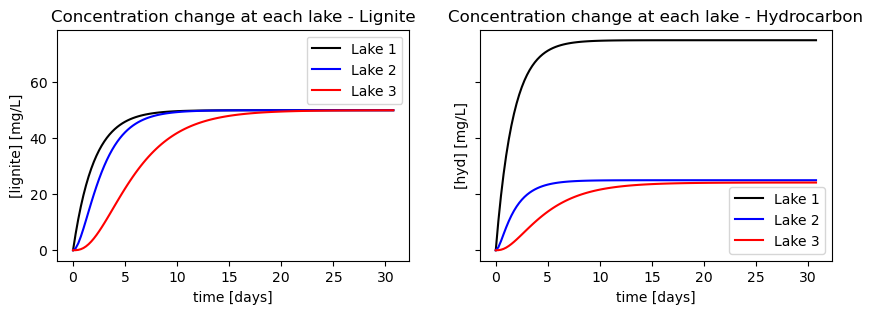

In [28]:
fig, ax = plt.subplots(1,2, figsize = (10,3), sharey = True)
ax[0].plot(time_intervals,results_lig[:,0],'-k', label = 'Lake 1')
ax[0].plot(time_intervals,results_lig[:,1],'-b', label = 'Lake 2')
ax[0].plot(time_intervals,results_lig[:,2],'-r', label = 'Lake 3')
ax[0].legend()
ax[0].set_title('Concentration change at each lake - Lignite')
ax[0].set_ylabel('[lignite] [mg/L]')
ax[0].set_xlabel('time [days]')
#Hydrocarbon
ax[1].plot(time_intervals,results_hyd[:,0],'-k', label = 'Lake 1')
ax[1].plot(time_intervals,results_hyd[:,1],'-b', label = 'Lake 2')
ax[1].plot(time_intervals,results_hyd[:,2],'-r', label = 'Lake 3')
ax[1].legend()
ax[1].set_title('Concentration change at each lake - Hydrocarbon')
ax[1].set_ylabel('[hyd] [mg/L]')
ax[1].set_xlabel('time [days]')

## Assignment:

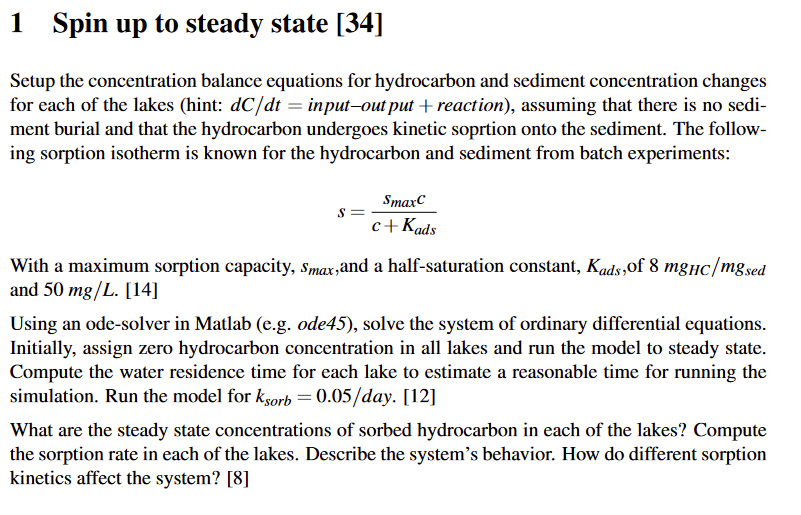

### Modifying dcdt to account for sorption

Now all parameters are connected, thus we need to include all the concentrations in a single ODE function:

In [46]:
def dcdt_hyc(t,y,V,C_in_hyc,C_in_lig,Q,k,s_max,K_ads,k_sorb):
    '''
    decribe the system of ode describing the sulphate concentration in each lake
    '''
    r = np.zeros(y.shape)
    s_eq_0 = s_max*y[3]*y[0]/(y[0]+K_ads)
    s_eq_1 = s_max*y[4]*y[1]/(y[1]+K_ads)
    s_eq_2 = s_max*y[5]*y[2]/(y[2]+K_ads)
    r[0] = (1/V[0])*Q*(C_in_hyc-y[0])-k[0]*y[0] - k_sorb*(s_eq_0 - y[6])
    r[1] = (1/V[1])*Q*(y[0]-y[1])-k[1]*y[1] - k_sorb*(s_eq_1 - y[7])
    r[2] = (1/V[2])*Q*(y[1]-y[2])-k[2]*y[2] - k_sorb*(s_eq_2 - y[8])
    r[3] = (1/V[0])*Q*(C_in_lig-y[3])
    r[4] = (1/V[1])*Q*(y[3]-y[4])
    r[5] = (1/V[2])*Q*(y[4]-y[5])
    r[6] = (1/V[0])*Q*(0-y[6]) + k_sorb*(s_eq_0 - y[6])
    r[7] = (1/V[1])*Q*(y[6]-y[7]) + k_sorb*(s_eq_1 - y[7])
    r[8] = (1/V[2])*Q*(y[7]-y[8]) + k_sorb*(s_eq_2 - y[8])
    return r
    

#### Adding additional parameters:

In [47]:
s_max = 8
K_ads = 50
k_sorb = 0.05
y0 = np.zeros(9)

In [48]:
time_intervals = np.arange(0,61,0.25)

In [49]:
results_ss = scipy.integrate.odeint(dcdt_hyc,y0,t = time_intervals,args = (V,C_in_hyd,C_in_lignite,Q,k,s_max,K_ads,k_sorb), tfirst = True)

#### Plotting the results

Text(0.5, 0, 'time [days]')

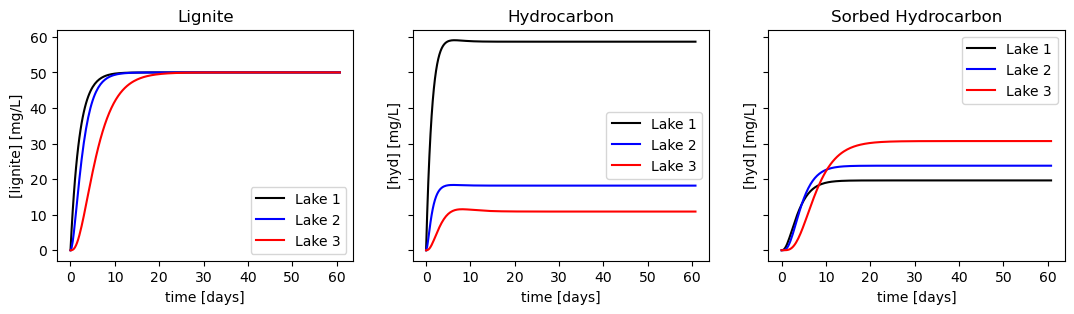

In [50]:
fig, ax = plt.subplots(1,3, figsize = (13,3), sharey = True)
ax[0].plot(time_intervals,results_ss[:,3],'-k', label = 'Lake 1')
ax[0].plot(time_intervals,results_ss[:,4],'-b', label = 'Lake 2')
ax[0].plot(time_intervals,results_ss[:,5],'-r', label = 'Lake 3')
ax[0].legend()
ax[0].set_title('Lignite')
ax[0].set_ylabel('[lignite] [mg/L]')
ax[0].set_xlabel('time [days]')
#Hydrocarbon
ax[1].plot(time_intervals,results_ss[:,0],'-k', label = 'Lake 1')
ax[1].plot(time_intervals,results_ss[:,1],'-b', label = 'Lake 2')
ax[1].plot(time_intervals,results_ss[:,2],'-r', label = 'Lake 3')
ax[1].legend()
ax[1].set_title('Hydrocarbon')
ax[1].set_ylabel('[hyd] [mg/L]')
ax[1].set_xlabel('time [days]')
#Sorbed Hydrocarbon
ax[2].plot(time_intervals,results_ss[:,6],'-k', label = 'Lake 1')
ax[2].plot(time_intervals,results_ss[:,7],'-b', label = 'Lake 2')
ax[2].plot(time_intervals,results_ss[:,8],'-r', label = 'Lake 3')
ax[2].legend()
ax[2].set_title('Sorbed Hydrocarbon')
ax[2].set_ylabel('[hyd] [mg/L]')
ax[2].set_xlabel('time [days]')

### Measuring the effect of sorption rate

In [56]:
k_ads_arr = np.linspace(0.01,10,30)
c_hyd_60 = []
c_lig_60 = []
c_s_hyd_60 = []
for K_ads in k_ads_arr:
    results_ss = scipy.integrate.odeint(dcdt_hyc,y0,t = time_intervals,args = (V,C_in_hyd,C_in_lignite,Q,k,s_max,K_ads,k_sorb), tfirst = True)
    c_hyd_60.append(results_ss[-1,0])
    c_lig_60.append(results_ss[-1,3])
    c_s_hyd_60.append(results_ss[-1,6])

Text(0.5, 0, 'K-ads [1/d]')

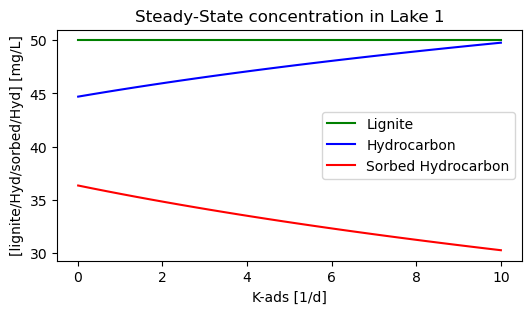

In [58]:
fig, ax = plt.subplots(figsize = (6,3), sharey = True)
ax.plot(k_ads_arr,c_lig_60,'-g', label = 'Lignite')
ax.plot(k_ads_arr,c_hyd_60,'-b', label = 'Hydrocarbon')
ax.plot(k_ads_arr,c_s_hyd_60,'-r', label = 'Sorbed Hydrocarbon')
ax.legend()
ax.set_title('Steady-State concentration in Lake 1')
ax.set_ylabel('[lignite/Hyd/sorbed/Hyd] [mg/L]')
ax.set_xlabel('K-ads [1/d]')


A faster kinetics increase the hydrocarbon concentration

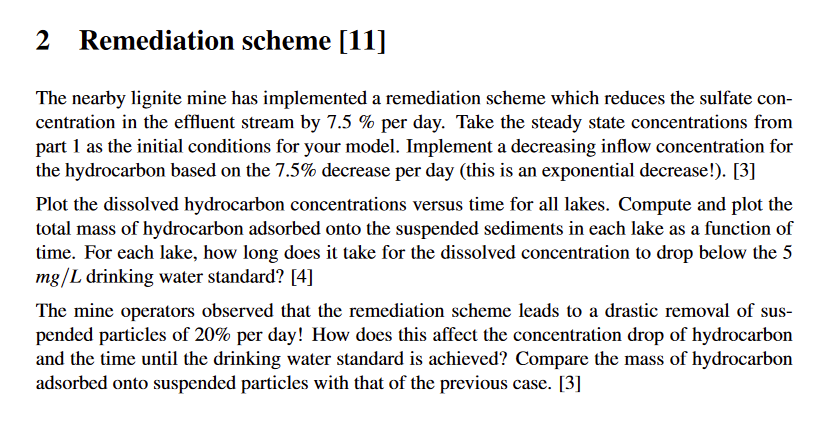

In [59]:
def dcdt_hyc(t,y,V,C_in_hyc,C_in_lig,Q,k,s_max,K_ads,k_sorb):
    '''
    decribe the system of ode describing the sulphate concentration in each lake
    '''
    r = np.zeros(y.shape)
    s_eq_0 = s_max*y[3]*y[0]/(y[0]+K_ads)
    s_eq_1 = s_max*y[4]*y[1]/(y[1]+K_ads)
    s_eq_2 = s_max*y[5]*y[2]/(y[2]+K_ads)
    r[0] = (1/V[0])*Q*(C_in_hyc-y[0])-k[0]*y[0] - k_sorb*(s_eq_0 - y[6]) - 0.075*y[0]
    r[1] = (1/V[1])*Q*(y[0]-y[1])-k[1]*y[1] - k_sorb*(s_eq_1 - y[7]) - 0.075*y[1]
    r[2] = (1/V[2])*Q*(y[1]-y[2])-k[2]*y[2] - k_sorb*(s_eq_2 - y[8]) - 0.075*y[2]
    r[3] = (1/V[0])*Q*(C_in_lig-y[3]) - 0.2*y[3]
    r[4] = (1/V[1])*Q*(y[3]-y[4]) - 0.2*y[4]
    r[5] = (1/V[2])*Q*(y[4]-y[5]) - 0.2*y[5]
    r[6] = (1/V[0])*Q*(0-y[6]) + k_sorb*(s_eq_0 - y[6])
    r[7] = (1/V[1])*Q*(y[6]-y[7]) + k_sorb*(s_eq_1 - y[7])
    r[8] = (1/V[2])*Q*(y[7]-y[8]) + k_sorb*(s_eq_2 - y[8])
    return r
    

#### Remediation Results:

In [60]:
results_rr = scipy.integrate.odeint(dcdt_hyc,y0,t = time_intervals,args = (V,C_in_hyd,C_in_lignite,Q,k,s_max,K_ads,k_sorb), tfirst = True)

#### Plotting the results

Text(0.5, 0, 'time [days]')

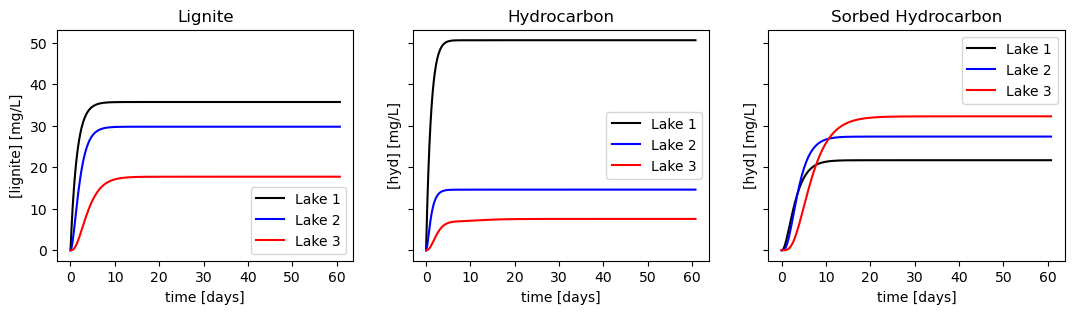

In [61]:
fig, ax = plt.subplots(1,3, figsize = (13,3), sharey = True)
ax[0].plot(time_intervals,results_rr[:,3],'-k', label = 'Lake 1')
ax[0].plot(time_intervals,results_rr[:,4],'-b', label = 'Lake 2')
ax[0].plot(time_intervals,results_rr[:,5],'-r', label = 'Lake 3')
ax[0].legend()
ax[0].set_title('Lignite')
ax[0].set_ylabel('[lignite] [mg/L]')
ax[0].set_xlabel('time [days]')
#Hydrocarbon
ax[1].plot(time_intervals,results_rr[:,0],'-k', label = 'Lake 1')
ax[1].plot(time_intervals,results_rr[:,1],'-b', label = 'Lake 2')
ax[1].plot(time_intervals,results_rr[:,2],'-r', label = 'Lake 3')
ax[1].legend()
ax[1].set_title('Hydrocarbon')
ax[1].set_ylabel('[hyd] [mg/L]')
ax[1].set_xlabel('time [days]')
#Sorbed Hydrocarbon
ax[2].plot(time_intervals,results_rr[:,6],'-k', label = 'Lake 1')
ax[2].plot(time_intervals,results_rr[:,7],'-b', label = 'Lake 2')
ax[2].plot(time_intervals,results_rr[:,8],'-r', label = 'Lake 3')
ax[2].legend()
ax[2].set_title('Sorbed Hydrocarbon')
ax[2].set_ylabel('[hyd] [mg/L]')
ax[2].set_xlabel('time [days]')

Text(0.5, 0, 'time [days]')

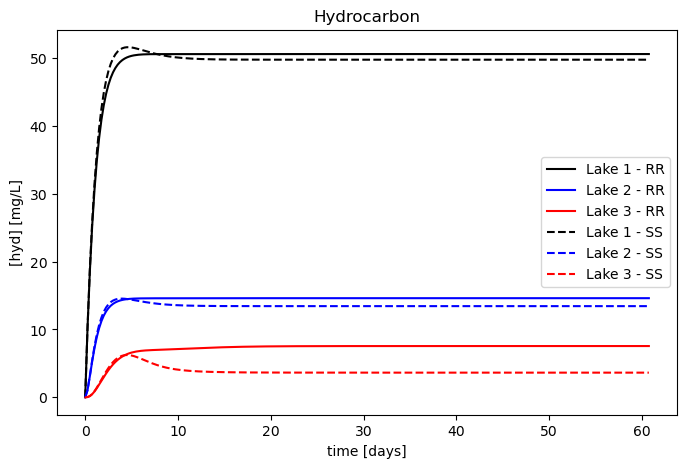

In [63]:
fig, ax = plt.subplots(figsize = (8,5), sharey = True)
#Hydrocarbon
ax.plot(time_intervals,results_rr[:,0],'-k', label = 'Lake 1 - RR')
ax.plot(time_intervals,results_rr[:,1],'-b', label = 'Lake 2 - RR')
ax.plot(time_intervals,results_rr[:,2],'-r', label = 'Lake 3 - RR')
#Hydrocarbon
ax.plot(time_intervals,results_ss[:,0],'--k', label = 'Lake 1 - SS')
ax.plot(time_intervals,results_ss[:,1],'--b', label = 'Lake 2 - SS')
ax.plot(time_intervals,results_ss[:,2],'--r', label = 'Lake 3 - SS')
ax.legend()
ax.set_title('Hydrocarbon')
ax.set_ylabel('[hyd] [mg/L]')
ax.set_xlabel('time [days]')

The remediation scheme yields larger steady-state concentrations than the original scenario, because less sorption sites are available